In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [381]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'ml'))
	print(os.getcwd())
except:
	pass

### ASSIGNMENT 2: PREDICT BOSTON HOUSING VALUES USING Multi Linear Regression

In [382]:
import pandas as pd


 ### STEPS
 * ENSURE HEALTH OF DATA - Remove any rows with missing values, outliers
 * ENSURE DISTRIBUTION OF DATA - ensure data distribution is normal. If not apply transformations/mutations
 * CHOOSE MODEL - Use OLS if independent variables have a linear relation with dependent variable
 * VERIFY ASSUMPTIONS OF THE MODEL
 * ITERATE - Based on results, fine tune the model
 * VALIDATE - Validate with test data
 * ITERATE SOME MORE - If Test Data r-sqrd not as per expectation, model might be over-fit. Tune it further

In [383]:
boston_housing_df = pd.read_csv("boston.csv")
boston_housing_df.head()



,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


 Validate the data types are proper (float/int for numeric types)

In [384]:
boston_housing_df.dtypes


CRIM     float64
INDUS    float64
NOX      float64
RM       float64
AGE      float64
DIS      float64
TAX        int64
PT       float64
B        float64
MV       float64
dtype: object

 Data types are verified to be correct - floats and ints for all numbers

In [385]:
boston_housing_df.shape


(506, 10)

 Note the number of rows -

 Analyze Basic stats to see std-dev, mean etc

In [386]:
pd.DataFrame.describe(boston_housing_df)


,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674030,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148862,2.105710,168.537116,2.164946,91.294863,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377487,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440002,21.200001
75%,3.677083,18.100000,0.624000,6.623500,94.074999,5.188425,666.000000,20.200001,396.225006,25.000000
max,88.976196,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.899994,50.000000


 It is observed from the stats that there are outliers in CRIM column. mean is .26 but max is 88!
 We will use zscore to remove outliers

In [387]:
from scipy import stats


 Remove outliers

In [388]:
import numpy as np 
boston_housing_df = boston_housing_df[(np.abs(stats.zscore(boston_housing_df))<3).all(axis=1)]


In [389]:
pd.DataFrame.describe(boston_housing_df)


,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,2.358735,10.772981,0.547157,6.297281,67.220950,3.870550,390.989201,18.336501,374.761855,23.115119
std,4.720433,6.820539,0.114481,0.644675,28.236259,1.995765,160.054232,2.163748,51.034829,8.811093
min,0.006320,0.460000,0.385000,4.368000,2.900000,1.129600,188.000000,12.600000,83.449997,5.600000
25%,0.076890,5.130000,0.448000,5.888500,42.500000,2.197700,277.000000,16.900000,378.169998,17.799999
50%,0.214090,8.560000,0.524000,6.211000,74.300003,3.414500,311.000000,18.700001,392.519989,21.700001
75%,1.921980,18.100000,0.611500,6.618500,93.599998,5.287300,437.000000,20.200001,396.899994,25.750000
max,28.655800,27.740000,0.871000,8.375000,100.000000,9.222900,711.000000,21.200001,396.899994,50.000000


 As can be seen, the max is now much closer, for CRIM column, to the mean
 Around 40 rows out of 506 were removed (~10%) - thats acceptable

In [390]:
boston_housing_df.shape


(463, 10)

 Check if there are any nulls in data

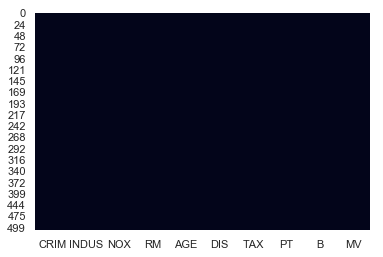

In [391]:
sns.heatmap(boston_housing_df.isnull(), cbar=False)


 No null values are observed as there is no white bars in the heatmap

### CHECK FOR MULTICOLLINEARITY, DISTRIBUTION

In [392]:
import seaborn as sns 


 Observe the distribution of Median Value variable

In [393]:
sns.set(color_codes=True)


In [394]:
sns.set(style='white', palette='muted')

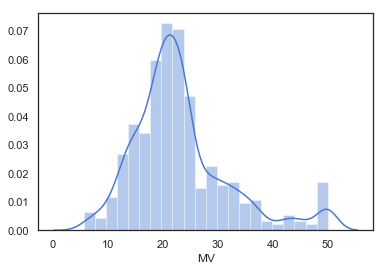

In [395]:
sns.distplot(boston_housing_df['MV'])


 As can be seen, the plot is more or less a good bell curve, not much skewness
 This meets one of the conditions for Linear Regression Modeling
 Let us now examine collinearity

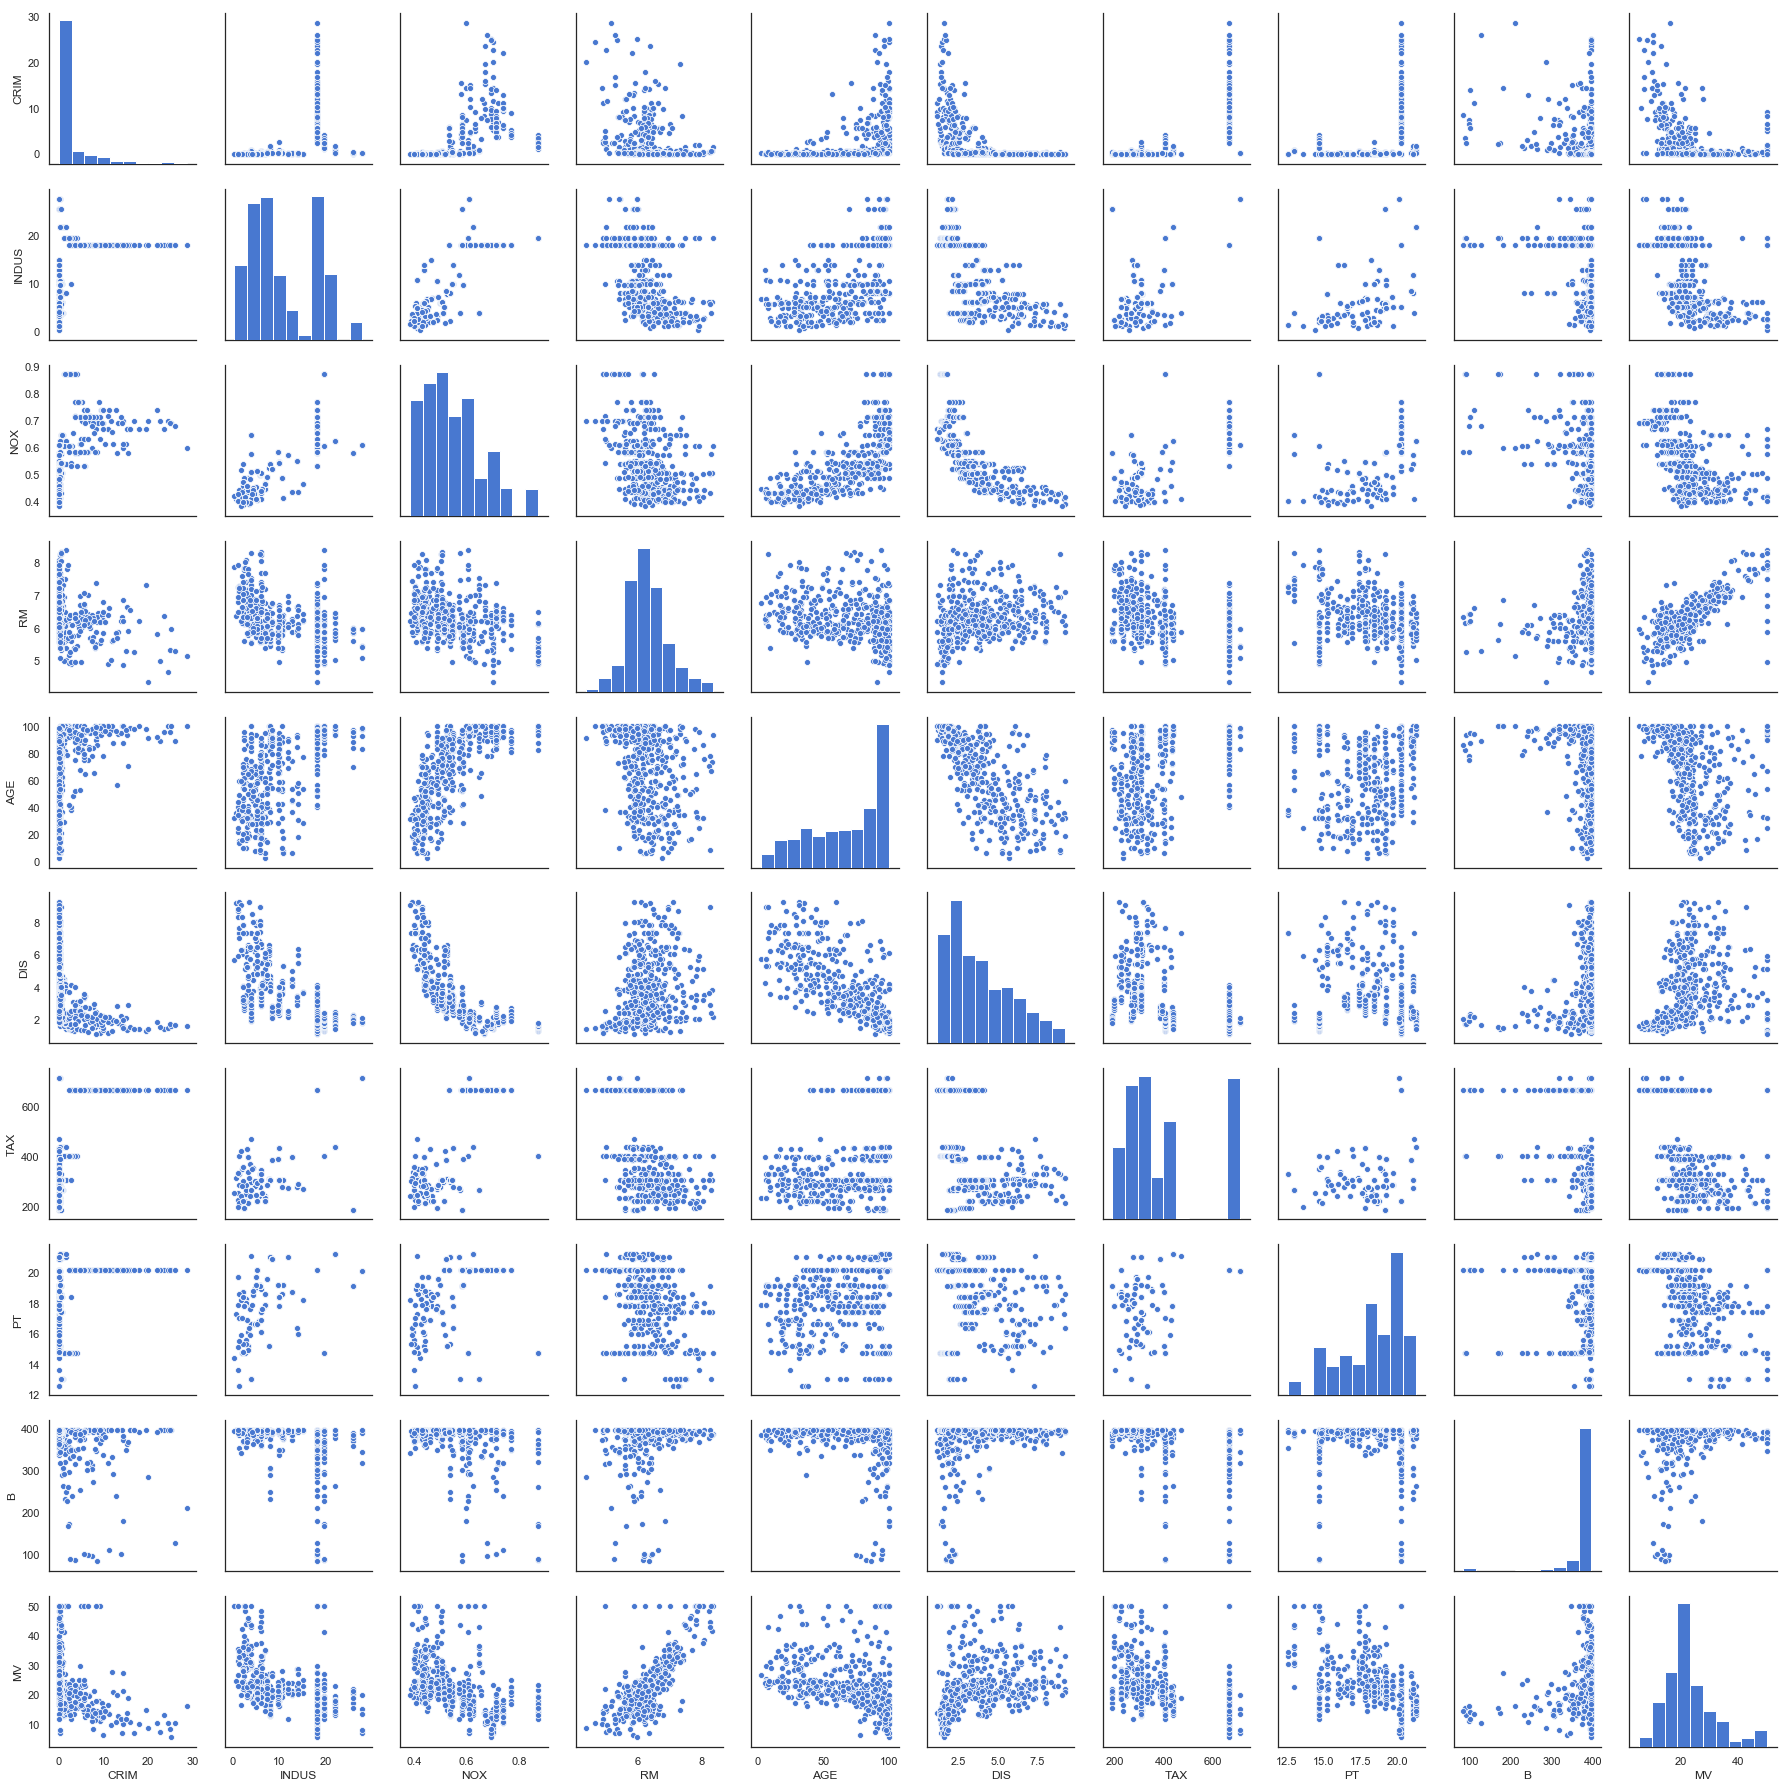

In [396]:
sns.pairplot(boston_housing_df)


 As can be seen, <br/>
 1) Relationship of most variables except RM (Number of Rooms) is not as linear as desired <br/>
 2) Variables CRIM, DIS, AGE, NOX are heavily skewed as can be seen in the historgram of these variables <br/>


 Let us also examine the correlation coefficients

In [397]:
corr = np.round(boston_housing_df.corr(), decimals=2)


In [398]:
corr.style.background_gradient(cmap='seismic')


,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
CRIM,1,0.5,0.53,-0.26,0.42,-0.46,0.73,0.34,-0.3,-0.38
INDUS,0.5,1,0.75,-0.41,0.63,-0.7,0.7,0.35,-0.32,-0.45
NOX,0.53,0.75,1,-0.34,0.72,-0.77,0.64,0.16,-0.37,-0.4
RM,-0.26,-0.41,-0.34,1,-0.26,0.23,-0.28,-0.34,0.15,0.75
AGE,0.42,0.63,0.72,-0.26,1,-0.74,0.48,0.25,-0.24,-0.37
DIS,-0.46,-0.7,-0.77,0.23,-0.74,1,-0.52,-0.23,0.25,0.23
TAX,0.73,0.7,0.64,-0.28,0.48,-0.52,1,0.42,-0.3,-0.4
PT,0.34,0.35,0.16,-0.34,0.25,-0.23,0.42,1,-0.02,-0.47
B,-0.3,-0.32,-0.37,0.15,-0.24,0.25,-0.3,-0.02,1,0.23
MV,-0.38,-0.45,-0.4,0.75,-0.37,0.23,-0.4,-0.47,0.23,1


In [399]:
corr.to_csv('corr4.csv')


 As can be seen in the correlation csv, many of the coeeficients are in the 0.2 to 0.4 (in the Median Value row) <br/>
  indicating there is no strong correlation between the target variable and independent variables <br/>
 NOX and INDUS are highly correlated (correlation coefficient is 0.75 - anything >0.6 is considered high) <br/>
 NOX and DIS are highly correlated (-0.83)

 To mitigate the skewness, let us apply log transformations to the variables

In [400]:
boston_housing_df['log_CRIM'] = np.log10(boston_housing_df['CRIM'])
boston_housing_df = boston_housing_df.drop(columns = ['CRIM'])
boston_housing_df['log_DIS'] = np.log10(boston_housing_df['DIS'])
boston_housing_df = boston_housing_df.drop(columns = ['DIS'])
boston_housing_df['log_AGE'] = np.log10(boston_housing_df['AGE'])
boston_housing_df = boston_housing_df.drop(columns = ['AGE'])
boston_housing_df['log_NOX'] = np.log10(boston_housing_df['NOX'])
boston_housing_df = boston_housing_df.drop(columns = ['NOX'])



## APPLY THE MODEL
 We are now ready to apply the model. <br/>
 First, create train and test data sets. Approx 20% data is left as test data.

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston_housing_df.drop("MV", axis=1), boston_housing_df['MV'], test_size = 0.2, random_state = 112)


In [402]:
import statsmodels.api as sm 



In [403]:
X_train = sm.add_constant(X_train)


 Apply the model

In [404]:
my_model = sm.OLS(Y_train, X_train)


In [405]:
result=my_model.fit()


In [406]:
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     82.55
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           5.29e-82
Time:                        03:32:52   Log-Likelihood:                -1119.7
No. Observations:                 370   AIC:                             2259.
Df Residuals:                     360   BIC:                             2298.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1928      5.653     -0.919      0.3

 ANALYSIS <br/>
 R-sqrd: goodness of fit - is 0.63 - this is acceptable <br/>
 Adjusted R-sqrd is also close (so we dont have too many variables) <br/>
 Adjusted R-sqrd: penalizes for too many predictors <br/>
 F-statistic:  Prob(F-statistic) is < 0.05, predictors are doing good <br/>
 AIC = log likelihood+constant - minimize AIC <br/>
 BIC = same as AIC but it penalizes for too many predictors. BIC will always be slightly higher than AIC <br/>


 Observe the P values in the results for each variable. <br/>
 For INDUS, B, the P value is > 0.05 - so this variable is not significant - remove it
 Also observe the correlation co-efficients. Columns with very low coeffs could be removed

In [407]:
X_train.drop(['INDUS', 'B'], axis=1, inplace = True)



 Re-run the model

In [408]:
my_model2 = sm.OLS(Y_train, X_train)


In [409]:
result2 = my_model2.fit()


In [410]:
print (result2.summary())


                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           3.74e-82
Time:                        03:33:34   Log-Likelihood:                -1124.1
No. Observations:                 370   AIC:                             2264.
Df Residuals:                     362   BIC:                             2296.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9421      5.266     -0.749      0.4

 No significant improvement observed in the results.

## VALIDATE ON TEST DATA

In [411]:
from sklearn.metrics import r2_score



In [412]:
X_test = X_test.drop(['INDUS', 'B'], axis=1)


In [413]:
predictions = result2.predict(sm.add_constant(X_test))


In [414]:
r2_score(Y_test, predictions)


0.7152866010567962

 R-sqrd value on test dataset is better than train dataset. <br/>
 Model is not overfit and we can recommend using this model <br/>
 Additional tuning can be done by removing skewness, removing specific columns based on correlation co-efficients <br/>
